In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import timeit
#import shap
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import train_test_split

___

# Read-in and One-Hot Encoding

In [4]:
df1 = pd.read_csv("../data/arrival_time_COMPLETE.csv")
df2 = pd.read_csv("../data/negative_duration_COMPLETE.csv")
df3 = pd.read_csv("../data/negative_peak_time_COMPLETE.csv")
df4 = pd.read_csv("../data/negative_pressure_COMPLETE.csv")
df5 = pd.read_csv("../data/positive_duration_COMPLETE.csv")
df6 = pd.read_csv("../data/positive_impulse_COMPLETE.csv")
df7 = pd.read_csv("../data/positive_peak_time_COMPLETE.csv")
df8 = pd.read_csv("../data/positive_pressure_COMPLETE.csv")

df1.head(5)

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
0,B1,24.5,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,Subcooled,5.0,0.010208
1,B1,24.5,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,Subcooled,6.0,0.012350
2,B1,24.5,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,Subcooled,7.0,0.014577
3,B1,24.5,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,Subcooled,8.0,0.016878
4,B1,24.5,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,Subcooled,9.0,0.019250


In [81]:
# Label encoding 'Status' feature into 0 and 1 
# 0 for Subcooled and 1 for Superheated
# Doing Similarly for ID (Do we need dummy encoding ??)

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df5['Status'] = LE.fit_transform(df5['Status'])
df5

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
0,B1,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,5.0,0.006817
1,B1,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,6.0,0.007302
2,B1,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,7.0,0.007816
3,B1,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,8.0,0.008326
4,B1,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,9.0,0.008817
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,P500,11.40239,0.442321,1.4,2.8,1.2,1.4,0.8,388.2,366.7,1,36.0,NaN
35996,P500,11.40239,0.442321,1.4,2.8,1.2,1.4,0.8,388.2,366.7,1,37.0,NaN
35997,P500,11.40239,0.442321,1.4,2.8,1.2,1.4,0.8,388.2,366.7,1,38.0,NaN
35998,P500,11.40239,0.442321,1.4,2.8,1.2,1.4,0.8,388.2,366.7,1,39.0,NaN


In [82]:
X = df5.drop(['ID','Target'], axis=1)[:28800]
X

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance
0,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,5.0
1,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,6.0
2,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,7.0
3,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,8.0
4,24.50000,0.519805,2.2,6.0,1.0,1.6,0.4,307.8,339.0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
28795,33.17377,0.372041,1.0,2.2,0.6,0.2,0.4,312.7,318.2,0,36.0
28796,33.17377,0.372041,1.0,2.2,0.6,0.2,0.4,312.7,318.2,0,37.0
28797,33.17377,0.372041,1.0,2.2,0.6,0.2,0.4,312.7,318.2,0,38.0
28798,33.17377,0.372041,1.0,2.2,0.6,0.2,0.4,312.7,318.2,0,39.0


In [83]:
y5 = df5['Target'][:28800]
y5

0        0.006817
1        0.007302
2        0.007816
3        0.008326
4        0.008817
           ...   
28795    0.012178
28796    0.012275
28797    0.012374
28798    0.012477
28799    0.012573
Name: Target, Length: 28800, dtype: float64

In [84]:
y1 = df1['Target'][:28800]
y2 = df2['Target'][:28800]
y3 = df3['Target'][:28800]
y4 = df4['Target'][:28800]
y6 = df6['Target'][:28800]
y7 = df7['Target'][:28800]
y8 = df8['Target'][:28800]

___

# Train-Test Set Split

In [85]:
X_traindf, X_testdf, y1_train, y1_test = train_test_split(X, y1, test_size=0.25, random_state=42)
print(X_traindf.shape)
print(X_testdf.shape)

(21600, 11)
(7200, 11)


In [86]:
y2_train, y2_test = train_test_split(y2, test_size=0.25, random_state=42)
y3_train, y3_test = train_test_split(y3, test_size=0.25, random_state=42)
y4_train, y4_test = train_test_split(y4, test_size=0.25, random_state=42)
y5_train, y5_test = train_test_split(y5, test_size=0.25, random_state=42)
y6_train, y6_test = train_test_split(y6, test_size=0.25, random_state=42)
y7_train, y7_test = train_test_split(y7, test_size=0.25, random_state=42)
y8_train, y8_test = train_test_split(y8, test_size=0.25, random_state=42)

In [87]:
y7_train.values

array([0.01284534, 0.01444022, 0.10035855, ..., 0.10251021, 0.07990494,
       0.01143898])

In [88]:
y8_train.values

array([1.1268162 , 0.62633157, 0.04595783, ..., 0.02130297, 0.13602383,
       2.3361142 ])

In [89]:
y_train = np.concatenate((y1_train.values.reshape(-1,1), y2_train.values.reshape(-1,1), y3_train.values.reshape(-1,1), 
                          y4_train.values.reshape(-1,1), y5_train.values.reshape(-1,1), y6_train.values.reshape(-1,1),
                          y7_train.values.reshape(-1,1), y8_train.values.reshape(-1,1)), axis=1)

y_test = np.concatenate((y1_test.values.reshape(-1,1), y2_test.values.reshape(-1,1), y3_test.values.reshape(-1,1), 
                          y4_test.values.reshape(-1,1), y5_test.values.reshape(-1,1), y6_test.values.reshape(-1,1),
                          y7_test.values.reshape(-1,1), y8_test.values.reshape(-1,1)), axis=1)

In [90]:
print(y_train.shape)
print(y_test.shape)

y_train

(21600, 8)
(7200, 8)


array([[1.11694350e-02, 1.56393350e-02, 2.44314220e-02, ...,
        2.86203890e+02, 1.28453400e-02, 1.12681620e+00],
       [1.24119570e-02, 1.88029450e-02, 2.82499930e-02, ...,
        1.80425900e+02, 1.44402250e-02, 6.26331570e-01],
       [9.50448220e-02, 1.51018300e-02, 1.09446822e-01, ...,
        1.49908640e+01, 1.00358550e-01, 4.59578340e-02],
       ...,
       [9.67233260e-02, 9.91223000e-03, 1.08929812e-01, ...,
        7.44885020e+00, 1.02510210e-01, 2.13029660e-02],
       [7.58939240e-02, 2.09730370e-02, 9.80206378e-02, ...,
        6.19014550e+01, 7.99049360e-02, 1.36023830e-01],
       [1.00712810e-02, 3.38855160e-02, 3.30022184e-02, ...,
        7.96478820e+02, 1.14389770e-02, 2.33611420e+00]])

In [91]:
y_test

array([[9.36676340e-02, 1.85481800e-02, 1.16362342e-01, ...,
        3.87540700e+01, 9.85093640e-02, 8.02679810e-02],
       [1.88341180e-02, 1.49853250e-02, 3.32267860e-02, ...,
        1.10768800e+02, 2.12428740e-02, 3.99188070e-01],
       [4.82065450e-02, 2.26087420e-02, 7.29268908e-02, ...,
        9.14076770e+01, 5.16740420e-02, 1.84897880e-01],
       ...,
       [7.48656170e-02, 1.68266440e-02, 9.27517236e-02, ...,
        3.51032030e+01, 7.93257060e-02, 9.26706940e-02],
       [1.48923780e-02, 2.82288120e-02, 3.50396958e-02, ...,
        3.61880250e+02, 1.65773410e-02, 1.17031230e+00],
       [4.29282640e-02, 7.86490400e-03, 5.24556696e-02, ...,
        1.25165350e+01, 4.73894250e-02, 4.77122370e-02]])

___

# Standardization and Power Transform

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [93]:
# Processing both X_train and X_test using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_traindf)
X_test = scaler.transform(X_testdf)

In [94]:
# Double check if it succeeded
# df_stdscal = pd.DataFrame(X_train)
# df_stdscal.hist(figsize = (20,20), bins=10)

In [95]:
power = PowerTransformer()

y_train_normal = power.fit_transform(y_train)
y_test_normal = power.transform(y_test)

In [144]:
y_test_normal[1:41, 7]

array([ 1.2307336 ,  0.24910146, -0.831784  ,  2.0508611 ,  1.9587778 ,
       -0.85284084, -0.62470907, -0.40038356, -0.8631201 , -1.5778222 ,
       -0.7038771 ,  0.84154063, -0.19823122,  0.15150616,  1.9936589 ,
        0.01610001,  0.52095824, -0.8711013 ,  0.52445894, -0.40326974,
       -0.31851378,  0.34941995,  1.7080039 ,  0.05973712, -0.53792906,
       -0.9154755 ,  1.6244624 , -1.2966477 , -1.6152964 , -0.60622245,
       -0.86146295,  1.4496433 ,  0.91446096,  0.5323532 ,  0.2408684 ,
        2.0028303 ,  1.8498372 , -0.6878157 ,  0.27277493,  2.0596213 ],
      dtype=float32)

In [145]:
y_test_check = power.inverse_transform(y_test_normal)
y_test_check[1:41,7]

array([0.39918816, 0.1848979 , 0.07076788, 1.6035292 , 1.08061   ,
       0.06908131, 0.08818352, 0.1089704 , 0.06826329, 0.01860523,
       0.08134043, 0.28987968, 0.12975073, 0.17156982, 1.2115376 ,
       0.15436816, 0.22705913, 0.06763053, 0.22765863, 0.10868871,
       0.11713052, 0.19952142, 0.6662189 , 0.15975928, 0.0959686 ,
       0.06414998, 0.5972092 , 0.03660977, 0.01633275, 0.08981633,
       0.0683949 , 0.4912349 , 0.30692577, 0.22901654, 0.18374074,
       1.2546518 , 0.837906  , 0.08270955, 0.1882602 , 1.7111793 ],
      dtype=float32)

In [96]:
# Double check if it succeeded
# df_stdscal = pd.DataFrame(y_train)
# df_stdscal.hist(figsize = (20,20), bins=10)

___

# ANN

In [61]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

torch.backends.cudnn.version() , torch.backends.cudnn.enabled

(8500, True)

In [62]:
# convert data to torch.FloatTensor
X_train_torch = torch.from_numpy(X_train.astype(np.float32))
X_test_torch = torch.from_numpy(X_test.astype(np.float32))



y_train_torch = torch.from_numpy(y_train_normal.astype(np.float32))
y_test_torch = torch.from_numpy(y_test_normal.astype(np.float32))


print(X_train_torch)

tensor([[ 0.1781, -0.9747, -1.5140,  ..., -0.7230, -0.7424, -1.4851],
        [-0.5207,  0.5219,  0.0684,  ..., -0.3853,  1.3470, -1.4851],
        [ 1.3911,  1.5275, -0.7228,  ...,  1.1182, -0.7424,  1.3998],
        ...,
        [-1.6514,  0.5764, -1.2503,  ...,  0.7199,  1.3470,  1.3998],
        [ 0.9835,  0.0136, -0.7228,  ..., -0.4908, -0.7424,  0.9190],
        [ 1.3715,  0.0745,  0.3321,  ...,  0.5537,  1.3470, -1.4851]])


In [64]:
y_train_torch

tensor([[-1.5635, -0.2529, -1.5952,  ...,  1.7208, -1.5793,  1.9725],
        [-1.5141,  0.3007, -1.4643,  ...,  1.2496, -1.5188,  1.6621],
        [ 1.4719, -0.3562,  1.2563,  ..., -1.2607,  1.4767, -1.1610],
        ...,
        [ 1.5271, -1.5180,  1.2393,  ..., -1.9253,  1.5457, -1.5339],
        [ 0.8278,  0.6314,  0.8805,  ...,  0.1587,  0.8070, -0.1412],
        [-1.6072,  1.9910, -1.3017,  ...,  2.7645, -1.6327,  2.0861]])

In [79]:
y_test_torch

tensor([[ 1.4265,  0.2594,  1.4827,  ..., -0.3158,  1.4172, -0.7165],
        [-1.2615, -0.3790, -1.2941,  ...,  0.7514, -1.2632,  1.2307],
        [-0.1525,  0.8573,  0.0472,  ...,  0.5555, -0.1603,  0.2491],
        ...,
        [ 0.7925, -0.0344,  0.7064,  ..., -0.4155,  0.7877, -0.5743],
        [-1.4161,  1.5036, -1.2322,  ...,  1.9603, -1.4382,  1.9839],
        [-0.3464, -2.0699, -0.6408,  ..., -1.4356, -0.3117, -1.1363]])

In [65]:
train_data = []
for i in range(len(X_train_torch)):
   train_data.append([X_train_torch[i],
                      y_train_torch[i] 
                     ])

test_data = []
for i in range(len(X_test_torch)):
   test_data.append([X_test_torch[i], 
                     y_test_torch[i]
                     ])


# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=512,               # batch_size could be smaller
    num_workers=6)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=512,
    num_workers=6)

In [67]:
for x,y in train_loader:
    print(y)
    # break

tensor([[-1.5635, -0.2529, -1.5952,  ...,  1.7208, -1.5793,  1.9725],
        [-1.5141,  0.3007, -1.4643,  ...,  1.2496, -1.5188,  1.6621],
        [ 1.4719, -0.3562,  1.2563,  ..., -1.2607,  1.4767, -1.1610],
        ...,
        [ 1.0281, -0.1669,  1.0810,  ..., -0.7466,  1.0396, -1.0728],
        [-1.0301,  0.9327, -0.8796,  ...,  1.3335, -1.0448,  1.4747],
        [ 0.3898,  1.2137,  0.5566,  ...,  0.6684,  0.3636,  0.3594]])
tensor([[-0.7113, -1.9940, -0.9887,  ..., -0.9161, -0.6854, -0.5824],
        [-1.1060, -1.5817, -1.3096,  ..., -0.1370, -1.0971,  0.5569],
        [ 1.4573, -0.1274,  1.5225,  ..., -0.8556,  1.4695, -1.2327],
        ...,
        [ 1.4257,  0.5992,  1.5349,  ..., -0.4649,  1.4292, -0.9813],
        [ 1.7834, -0.6894,  1.5641,  ..., -2.1419,  1.8068, -1.6319],
        [-0.2402,  0.8010, -0.1060,  ...,  0.8753, -0.2588,  0.7318]])
tensor([[ 0.2848, -0.7753,  0.1801,  ..., -0.6132,  0.2967, -0.7336],
        [-0.0029, -0.2827, -0.0884,  ..., -0.0484, -0.0044, -0

In [68]:
## Define the NN architecture
## NN with 3 hidden layer, s=[26, 256, 256, 256, 8]

class BleveNet(nn.Module):
    def __init__(self):
        super(BleveNet, self).__init__()
        # The first hidden layer has 256 neurons
        self.fc1 = nn.Linear(X_train_torch.shape[1], 256)
        # The second hidden layer has 256 neurons
        self.fc2 = nn.Linear(256, 256)
        # The third hidden layer has 256 neurons
        self.fc3 = nn.Linear(256, 256)
        # The final layer has 1 output neuron
        self.fc4 = nn.Linear(256, 8)


        # Define proportion or neurons to dropout
        self.dropout = nn.Dropout(0.1)

        # Mish activation
        self.mish = nn.Mish()


    def forward(self, x):
        # add first fully connected layer
        x = self.fc1(x)
        x = self.mish(x)
        x = self.dropout(x)
        # add second fully connected layer
        x = self.fc2(x)
        x = self.mish(x)
        x = self.dropout(x)
        # add third fully connected layer
        x = self.fc3(x)
        x = self.mish(x)
        x = self.dropout(x)
        # add final fully connected layers, separated in 8 different outputs
        output = self.fc4(x)
       
        return output

# initialize the NN
model = BleveNet()
print(model)

BleveNet(
  (fc1): Linear(in_features=11, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=8, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (mish): Mish()
)


In [69]:
criterion = nn.HuberLoss()        # This is the best loss function for my model
# criterion = nn.MSELoss()


optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-5)     # This is the best optimizer for my model 

# Check for GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [70]:
n_epochs = 200 

model.to(device)    # bring the model to gpu
model.train()       # prep model for training

train_losses = []
for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        #bring data and target to gpu
        data, target = data.to(device), target.to(device)
        
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
    train_losses.append(train_loss)

    print('Epoch: {}/{} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        n_epochs, 
        train_loss
        ))

Epoch: 1/200 	Training Loss: 0.061244
Epoch: 2/200 	Training Loss: 0.016938
Epoch: 3/200 	Training Loss: 0.014251
Epoch: 4/200 	Training Loss: 0.012376
Epoch: 5/200 	Training Loss: 0.011539
Epoch: 6/200 	Training Loss: 0.011046
Epoch: 7/200 	Training Loss: 0.009998
Epoch: 8/200 	Training Loss: 0.009740
Epoch: 9/200 	Training Loss: 0.009226
Epoch: 10/200 	Training Loss: 0.009230
Epoch: 11/200 	Training Loss: 0.008903
Epoch: 12/200 	Training Loss: 0.008674
Epoch: 13/200 	Training Loss: 0.008307
Epoch: 14/200 	Training Loss: 0.008143
Epoch: 15/200 	Training Loss: 0.008208
Epoch: 16/200 	Training Loss: 0.007733
Epoch: 17/200 	Training Loss: 0.007973
Epoch: 18/200 	Training Loss: 0.007555
Epoch: 19/200 	Training Loss: 0.007456
Epoch: 20/200 	Training Loss: 0.007612
Epoch: 21/200 	Training Loss: 0.007620
Epoch: 22/200 	Training Loss: 0.007586
Epoch: 23/200 	Training Loss: 0.007154
Epoch: 24/200 	Training Loss: 0.007146
Epoch: 25/200 	Training Loss: 0.007116
Epoch: 26/200 	Training Loss: 0.00

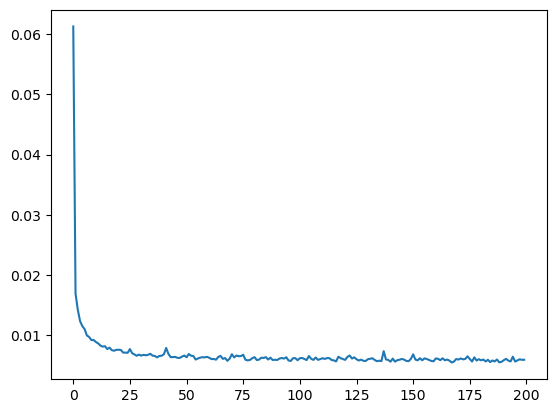

In [71]:
plt.plot(train_losses)

# Save the model  -- I already saved this and submitted
torch.save(model.state_dict(), 'PyTorch_Model/NN_mish_Drop_L2_Huber_200Epoch_Vol.pt')

**Loading the saved state**

In [101]:
model.load_state_dict(torch.load('PyTorch_Model/NN_mish_Drop_L2_Huber_200Epoch_Vol.pt', map_location=torch.device('cpu')))

model.eval()           # prep model for *evaluation*
model.to(device)
with torch.no_grad():  # turn off gradient to save memory
    y_predNN_torch = model(X_test_torch.to(device))

y_predNN_normal = y_predNN_torch.cpu().numpy()     # convert to numpy array
y_test_normal = y_test_torch.cpu().numpy()
print(y_predNN_normal)

[[ 1.3419185   0.35157678  1.3956077  ... -0.35246992  1.3304638
  -0.68985176]
 [-1.2606275  -0.31761965 -1.288682   ...  0.8197284  -1.2664359
   1.2713753 ]
 [-0.17855293  0.9834371   0.0251878  ...  0.57652086 -0.18772097
   0.28882495]
 ...
 [ 0.7846289  -0.14635831  0.70466614 ... -0.47137696  0.782771
  -0.63114977]
 [-1.4689081   1.5421643  -1.2747688  ...  2.0490417  -1.496314
   2.0510683 ]
 [-0.31857166 -1.8138261  -0.5870665  ... -1.2275565  -0.28610098
  -0.95879877]]


In [104]:
mape = mean_absolute_percentage_error(y_test_normal, y_predNN_normal)
r2 = r2_score(y_test_normal, y_predNN_normal)
print(f"Neural Network scores in normal distribution: r2 = {r2}, mape = {mape}")

Neural Network scores in normal distribution: r2 = 0.991845493561251, mape = 0.7107011079788208


In [118]:
y_test_32 = y_test.astype('float32')
y_test_32

array([[9.3667634e-02, 1.8548179e-02, 1.1636234e-01, ..., 3.8754070e+01,
        9.8509364e-02, 8.0267981e-02],
       [1.8834118e-02, 1.4985325e-02, 3.3226784e-02, ..., 1.1076880e+02,
        2.1242874e-02, 3.9918807e-01],
       [4.8206545e-02, 2.2608742e-02, 7.2926894e-02, ..., 9.1407677e+01,
        5.1674042e-02, 1.8489788e-01],
       ...,
       [7.4865617e-02, 1.6826645e-02, 9.2751727e-02, ..., 3.5103203e+01,
        7.9325706e-02, 9.2670694e-02],
       [1.4892378e-02, 2.8228812e-02, 3.5039697e-02, ..., 3.6188025e+02,
        1.6577341e-02, 1.1703123e+00],
       [4.2928264e-02, 7.8649037e-03, 5.2455671e-02, ..., 1.2516535e+01,
        4.7389425e-02, 4.7712237e-02]], dtype=float32)

In [126]:
np.argwhere(np.isnan(y_predNN))

array([[   4,    7],
       [  40,    7],
       [  78,    7],
       [ 128,    3],
       [ 128,    7],
       [ 161,    7],
       [ 180,    7],
       [ 295,    7],
       [ 612,    7],
       [ 636,    7],
       [ 646,    7],
       [ 708,    7],
       [ 784,    7],
       [ 937,    7],
       [ 951,    7],
       [1073,    7],
       [1154,    7],
       [1192,    7],
       [1202,    7],
       [1386,    7],
       [1429,    7],
       [1503,    7],
       [1504,    7],
       [1535,    7],
       [1550,    7],
       [1551,    7],
       [1632,    7],
       [1650,    7],
       [1670,    7],
       [1703,    7],
       [1797,    3],
       [1797,    7],
       [1806,    7],
       [1851,    7],
       [1932,    7],
       [1963,    7],
       [2010,    7],
       [2042,    7],
       [2079,    7],
       [2136,    7],
       [2169,    7],
       [2207,    7],
       [2222,    7],
       [2263,    7],
       [2331,    7],
       [2396,    7],
       [2466,    7],
       [2500,

In [133]:
y_predNN[1:41,7]

array([0.41398525, 0.19057024, 0.07022166,        nan, 1.3611119 ,
       0.07738686, 0.08599842, 0.10823703, 0.06788445, 0.02410531,
       0.07842994, 0.30146182, 0.15119481, 0.18803334, 1.4355588 ,
       0.14433491, 0.23122919, 0.07023752, 0.231385  , 0.10801053,
       0.11071312, 0.196836  , 0.7667458 , 0.17168367, 0.10047543,
       0.06725502, 0.5704529 , 0.0394274 , 0.01899445, 0.08809388,
       0.06571853, 0.50231683, 0.31495237, 0.23754072, 0.18424547,
       1.8959973 , 0.9359857 , 0.10310471, 0.18972826,        nan],
      dtype=float32)

In [137]:
y_predNN_normal[1:41,7]

array([ 1.2713753 ,  0.28882495, -0.8385837 ,  2.1866858 ,  2.0217519 ,
       -0.750896  , -0.64968836, -0.40790528, -0.86789644, -1.4890143 ,
       -0.73839784,  0.8916608 , -0.01011739,  0.27118924,  2.0324287 ,
       -0.06818043,  0.5451149 , -0.83838594,  0.5460082 , -0.41023454,
       -0.38261923,  0.33150393,  1.8001761 ,  0.15236624, -0.48923042,
       -0.87585044,  1.5863527 , -1.2550513 , -1.5714498 , -0.6257286 ,
       -0.89537835,  1.4712195 ,  0.94701195,  0.58082664,  0.24446476,
        2.0708477 ,  1.9030248 , -0.46132648,  0.28299537,  2.1624386 ],
      dtype=float32)

In [134]:
y_test[1:41,7]

array([0.39918807, 0.18489788, 0.07076792, 1.603528  , 1.0806105 ,
       0.06908134, 0.08818348, 0.10897039, 0.06826332, 0.01860524,
       0.08134046, 0.28987974, 0.12975076, 0.17156978, 1.2115381 ,
       0.15436813, 0.22705919, 0.06763056, 0.22765867, 0.10868868,
       0.11713055, 0.19952142, 0.66621888, 0.15975925, 0.09596858,
       0.06414993, 0.59720933, 0.03660972, 0.01633277, 0.08981635,
       0.06839496, 0.49123496, 0.30692583, 0.2290165 , 0.18374079,
       1.2546521 , 0.83790588, 0.08270955, 0.18826026, 1.7111793 ])

In [119]:
y_predNN = power.inverse_transform(y_predNN_normal)
mape = mean_absolute_percentage_error(y_test, y_predNN.astype('float64'))
r2 = r2_score(y_test, y_predNN)

print(f"Neural Network scores in actual distribution: r2 = {r2}, mape = {mape}")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [135]:
y_predNN[1:41,7]

array([0.41398525, 0.19057024, 0.07022166,        nan, 1.3611119 ,
       0.07738686, 0.08599842, 0.10823703, 0.06788445, 0.02410531,
       0.07842994, 0.30146182, 0.15119481, 0.18803334, 1.4355588 ,
       0.14433491, 0.23122919, 0.07023752, 0.231385  , 0.10801053,
       0.11071312, 0.196836  , 0.7667458 , 0.17168367, 0.10047543,
       0.06725502, 0.5704529 , 0.0394274 , 0.01899445, 0.08809388,
       0.06571853, 0.50231683, 0.31495237, 0.23754072, 0.18424547,
       1.8959973 , 0.9359857 , 0.10310471, 0.18972826,        nan],
      dtype=float32)

In [136]:
y_test[1:41,7]

array([0.39918807, 0.18489788, 0.07076792, 1.603528  , 1.0806105 ,
       0.06908134, 0.08818348, 0.10897039, 0.06826332, 0.01860524,
       0.08134046, 0.28987974, 0.12975076, 0.17156978, 1.2115381 ,
       0.15436813, 0.22705919, 0.06763056, 0.22765867, 0.10868868,
       0.11713055, 0.19952142, 0.66621888, 0.15975925, 0.09596858,
       0.06414993, 0.59720933, 0.03660972, 0.01633277, 0.08981635,
       0.06839496, 0.49123496, 0.30692583, 0.2290165 , 0.18374079,
       1.2546521 , 0.83790588, 0.08270955, 0.18826026, 1.7111793 ])

In [76]:
y_test

array([[ 1.4264572 ,  0.25943604,  1.4826803 , ..., -0.31575143,
         1.4172286 , -0.71653765],
       [-1.2615352 , -0.37904325, -1.2940732 , ...,  0.7514473 ,
        -1.2632077 ,  1.2307336 ],
       [-0.15251897,  0.85732245,  0.04723866, ...,  0.55549186,
        -0.16029689,  0.24910146],
       ...,
       [ 0.79249597, -0.03439955,  0.7064419 , ..., -0.41549242,
         0.7877065 , -0.5742728 ],
       [-1.4161336 ,  1.5035548 , -1.2321873 , ...,  1.9603044 ,
        -1.4381645 ,  1.9839134 ],
       [-0.3463911 , -2.0699105 , -0.6407975 , ..., -1.4355813 ,
        -0.31168935, -1.1362922 ]], dtype=float32)

In [77]:
y_test_normal

array([[ 1.42645712,  0.25943604,  1.48268033, ..., -0.31575143,
         1.41722856, -0.71653765],
       [-1.26153516, -0.37904324, -1.29407324, ...,  0.75144733,
        -1.26320771,  1.23073358],
       [-0.15251897,  0.85732247,  0.04723866, ...,  0.55549186,
        -0.16029688,  0.24910145],
       ...,
       [ 0.79249594, -0.03439955,  0.70644185, ..., -0.41549242,
         0.78770649, -0.57427283],
       [-1.41613359,  1.50355488, -1.23218724, ...,  1.96030433,
        -1.43816449,  1.98391344],
       [-0.34639111, -2.06991055, -0.6407975 , ..., -1.43558129,
        -0.31168935, -1.13629226]])

In [75]:
y_predNN_normal

array([[ 1.3419185 ,  0.35157678,  1.3956077 , ..., -0.35246992,
         1.3304638 , -0.68985176],
       [-1.2606275 , -0.31761965, -1.288682  , ...,  0.8197284 ,
        -1.2664359 ,  1.2713753 ],
       [-0.17855293,  0.9834371 ,  0.0251878 , ...,  0.57652086,
        -0.18772097,  0.28882495],
       ...,
       [ 0.7846289 , -0.14635831,  0.70466614, ..., -0.47137696,
         0.782771  , -0.63114977],
       [-1.4689081 ,  1.5421643 , -1.2747688 , ...,  2.0490417 ,
        -1.496314  ,  2.0510683 ],
       [-0.31857166, -1.8138261 , -0.5870665 , ..., -1.2275565 ,
        -0.28610098, -0.95879877]], dtype=float32)